# Decision Support System for Medication Necessity


## Fuzzy Logic
Fuzzy logic deals with imprecise or uncertain information, allowing for degrees of truth between 0 and 1, rather than just true or false. It provides flexibility in reasoning where traditional binary logic is too restrictive.

In fuzzy logic, a membership function defines how much an input belongs to a set, with values between 0 (non-membership) and 1 (full membership). Fuzzy rules, expressed as if-then statements, relate input variables to output variables.

Fuzzy logic is widely used in applications such as control systems, image processing, natural language processing, medical diagnosis, and artificial intelligence. It accounts for partial truths, where statements can be partially true and false, providing a more nuanced approach to decision-making compared to the Boolean system's absolute true or false values.

![Fuzzy Logic image](https://media.geeksforgeeks.org/wp-content/uploads/fuzzy-logic_1.png)

### **ARCHITECTURE**

Its Architecture contains four parts :

- RULE BASE: It contains the set of rules and the IF-THEN conditions provided by the experts to govern the decision-making system, on the basis of linguistic information. Recent developments in fuzzy theory offer several effective methods for the design and tuning of fuzzy controllers. Most of these developments reduce the number of fuzzy rules.
- FUZZIFICATION: It is used to convert inputs i.e. crisp numbers into fuzzy sets. Crisp inputs are basically the exact inputs measured by sensors and passed into the control system for processing, such as temperature, pressure, rpm’s, etc.
- INFERENCE ENGINE: It determines the matching degree of the current fuzzy input with respect to each rule and decides which rules are to be fired according to the input field. Next, the fired rules are combined to form the control actions.
- DEFUZZIFICATION: It is used to convert the fuzzy sets obtained by the inference engine into a crisp value. There are several defuzzification methods available and the best-suited one is used with a specific expert system to reduce the error.




![Fuzzy architecture](https://media.geeksforgeeks.org/wp-content/uploads/fuzzylogic_architecture.png)

Importing Necessary modules

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

Defining the universe of discourse for each variable

In [ ]:
symptom_severity = np.arange(0, 11, 1)  # Symptom severity from 0 to 10
test_results = np.arange(0, 101, 1)     # Test results from 0 to 100
age = np.arange(0, 101, 1)              # Age from 0 to 100
weight = np.arange(0, 201, 1)           # Weight from 0 to 200 kg
blood_pressure = np.arange(0, 201, 1)   # Blood pressure from 0 to 200 mmHg
medication_necessity = np.arange(0, 101, 1)  # Medication necessity from 0 to 100

Defining fuzzy membership functions for symptom severity

In [ ]:
#for symptom severity
severity_lo = fuzz.trimf(symptom_severity, [0, 0, 5])
severity_md = fuzz.trimf(symptom_severity, [0, 5, 10])
severity_hi = fuzz.trimf(symptom_severity, [5, 10, 10])

In [ ]:
#for test results
test_lo = fuzz.trimf(test_results, [0, 0, 50])
test_md = fuzz.trimf(test_results, [0, 50, 100])
test_hi = fuzz.trimf(test_results, [50, 100, 100])


In [ ]:
# for age
age_young = fuzz.trimf(age, [0, 0, 30])
age_middle = fuzz.trimf(age, [20, 40, 60])
age_old = fuzz.trimf(age, [50, 100, 100])

In [ ]:
# for weight
weight_lo = fuzz.trimf(weight, [0, 0, 75])
weight_md = fuzz.trimf(weight, [50, 100, 150])
weight_hi = fuzz.trimf(weight, [100, 200, 200])

In [ ]:
# for blood pressure
bp_low = fuzz.trimf(blood_pressure, [0, 0, 90])
bp_normal = fuzz.trimf(blood_pressure, [80, 120, 140])
bp_high = fuzz.trimf(blood_pressure, [130, 200, 200])

In [ ]:
# for medication necessity
necessity_lo = fuzz.trimf(medication_necessity, [0, 0, 50])
necessity_md = fuzz.trimf(medication_necessity, [0, 50, 100])
necessity_hi = fuzz.trimf(medication_necessity, [50, 100, 100])

Now, let's define the universe of discourse for each variable:

In [ ]:
symptom_severity_var = ctrl.Antecedent(symptom_severity, 'symptom_severity')
test_results_var = ctrl.Antecedent(test_results, 'test_results')
age_var = ctrl.Antecedent(age, 'age')
weight_var = ctrl.Antecedent(weight, 'weight')
blood_pressure_var = ctrl.Antecedent(blood_pressure, 'blood_pressure')
medication_necessity_var = ctrl.Consequent(medication_necessity, 'medication_necessity')

Assigning membership functions to fuzzy variables

In [ ]:

symptom_severity_var['low'] = severity_lo
symptom_severity_var['medium'] = severity_md
symptom_severity_var['high'] = severity_hi

In [ ]:
test_results_var['low'] = test_lo
test_results_var['medium'] = test_md
test_results_var['high'] = test_hi

In [ ]:
age_var['young'] = age_young
age_var['middle'] = age_middle
age_var['old'] = age_old

In [ ]:
weight_var['low'] = weight_lo
weight_var['medium'] = weight_md
weight_var['high'] = weight_hi

In [ ]:
blood_pressure_var['low'] = bp_low
blood_pressure_var['normal'] = bp_normal
blood_pressure_var['high'] = bp_high

In [ ]:
medication_necessity_var['low'] = necessity_lo
medication_necessity_var['medium'] = necessity_md
medication_necessity_var['high'] = necessity_hi


Now defining the fuzzy rules for decision

In [ ]:

rule1 = ctrl.Rule(symptom_severity_var['low'] & test_results_var['low'], medication_necessity_var['low'])
rule2 = ctrl.Rule(symptom_severity_var['low'] & test_results_var['medium'], medication_necessity_var['medium'])
rule3 = ctrl.Rule(symptom_severity_var['low'] & test_results_var['high'], medication_necessity_var['medium'])
rule4 = ctrl.Rule(symptom_severity_var['medium'] & test_results_var['low'], medication_necessity_var['medium'])
rule5 = ctrl.Rule(symptom_severity_var['medium'] & test_results_var['medium'], medication_necessity_var['high'])
rule6 = ctrl.Rule(symptom_severity_var['medium'] & test_results_var['high'], medication_necessity_var['high'])
rule7 = ctrl.Rule(symptom_severity_var['high'] & test_results_var['low'], medication_necessity_var['high'])
rule8 = ctrl.Rule(symptom_severity_var['high'] & test_results_var['medium'], medication_necessity_var['high'])
rule9 = ctrl.Rule(symptom_severity_var['high'] & test_results_var['high'], medication_necessity_var['high'])
rule10 = ctrl.Rule(age_var['young'] & weight_var['low'] & blood_pressure_var['low'], medication_necessity_var['low'])
rule11 = ctrl.Rule(age_var['middle'] & weight_var['medium'] & blood_pressure_var['normal'], medication_necessity_var['medium'])
rule12 = ctrl.Rule(age_var['old'] & weight_var['high'] & blood_pressure_var['high'], medication_necessity_var['high'])


In [ ]:
# Create control system
medication_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12])
medication_sim = ctrl.ControlSystemSimulation(medication_ctrl)

### **Testing the fuzzy logic with example inputs:**

In [ ]:
medication_sim.input['symptom_severity'] = 6
medication_sim.input['test_results'] = 65
medication_sim.input['age'] = 45
medication_sim.input['weight'] = 70
medication_sim.input['blood_pressure'] = 130

In [ ]:
# Compute the result
medication_sim.compute()

In [ ]:
# Print and plot the result
print(f"Medication Necessity: {medication_sim.output['medication_necessity']}%")

Medication Necessity: 82.17948717948723%


Plotting the necessary results

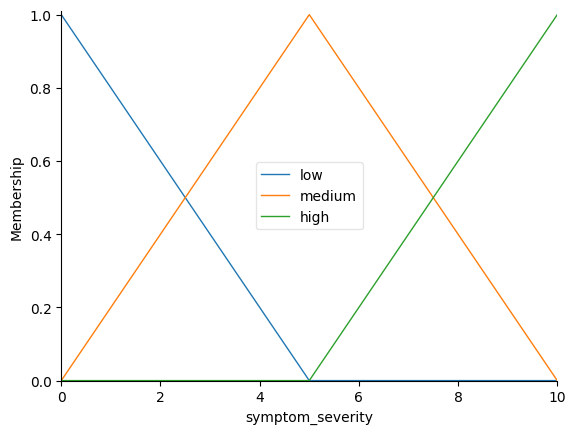

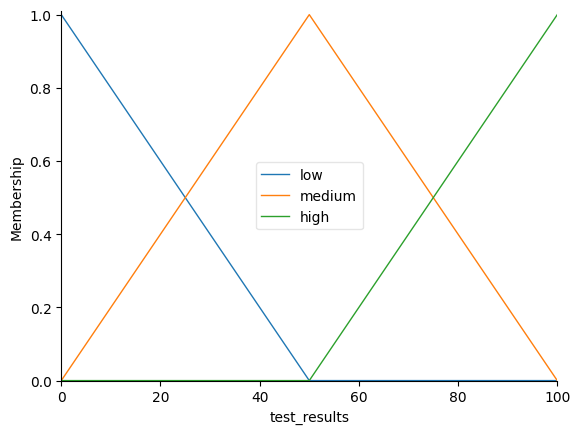

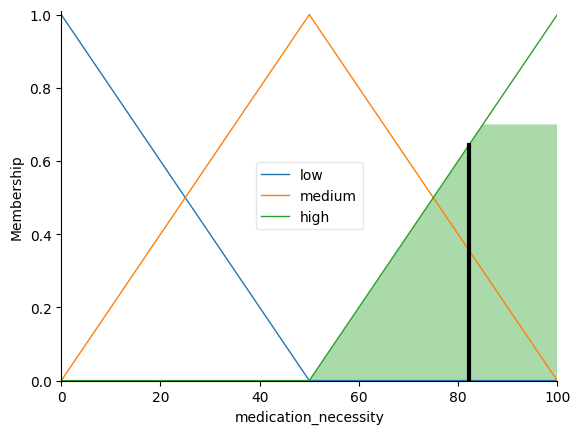

In [ ]:
symptom_severity_var.view()
test_results_var.view()
age_var.view()
weight_var.view()
blood_pressure_var.view()
medication_necessity_var.view(sim=medication_sim)